# CGLのパターン読み込み

LifeWikiにおけるPlainText形式 （http://www.conwaylife.com/wiki/Plaintext） をNumpy配列へ変換する関数

In [39]:
import re
import urllib.request

import numpy as np
import matplotlib.pyplot as plt

In [52]:
def convert_CGL_pattern_to_array(ptr):
    """LifeWikiのPlainText形式をNumpy配列へ変換する
    Args:
        ptr: PlainText形式のパターンの文字列
             LifeWikiで入手できる
    Returns:
        ptr_arr: パターンのNumpy配列
    """
    PTN_skip = re.compile(r"^!.*$")
    table = str.maketrans({".":"0","O":"1"})
    
    lines = ptr.splitlines()
    lines = [line for line in lines if PTN_skip.match(line) is None]
    width = max([len(line) for line in lines])
    lines = [[int(word.translate(table)) for word in line.ljust(width, ".")] for line in lines]
    ptn_arr = np.array(lines, dtype=int)
    
    return ptn_arr

In [46]:
# ファイルから読み込む場合
with open("./CGL_patterns/pinwheel.cells", "r") as f:
    lines_str = f.read()

In [49]:
# web（LifeWiki）から読み込む場合
with urllib.request.urlopen("https://www.conwaylife.com/patterns/gosperglidergun.cells") as response:
    lines_str = response.read().decode()

In [50]:
# 読み込んだパタンの文字列（lines_str）をNumpy配列へ変換し（ptn_arrへ）代入
ptn_arr = convert_CGL_pattern_to_array(lines_str)

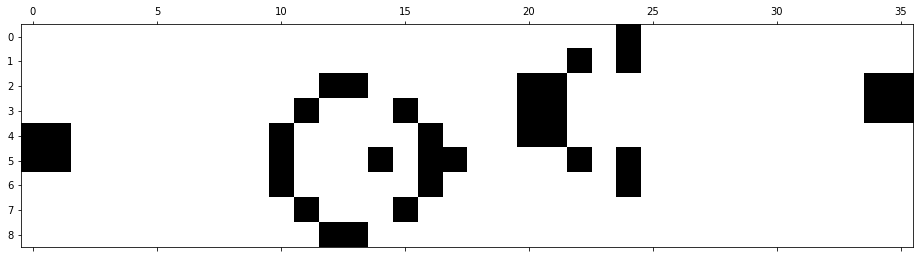

In [51]:
# 可視化
plt.matshow(ptn_arr, cmap = "binary")